# **Jupyter notebook (Caracterización de redes y topologías biológicas)**
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## **Práctica 2: Gráfos Aleatorios, Regulares, de Mundo pequeño y libres de escala**

### 1. Estudiar las propiedeades de un grafo aleatorio.

**a. Usando la función gnp_random_graph(n,p) de NetworkX, implementad una rutina Python L_C_Aleatorio que devuelva el valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos aleatorios de n nodos y probabilidad p.** 

El formato de la función debe ser:

``[l,c] = L_C_Aleatorio(n_graph,n,p)``

In [1]:
# importación librerías
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pickle
import os.path
import string

* Definir K exactamente y explicar por qué puede ser interesante coger dicho valor (su media). 
* Explicar los diferentes pasos y por qué cogemos n-1 cuando el grafo no es conexo. 

In [2]:
# Definición de la función
def L_C_Aleatorio(n_graph, n, P):
    C = []
    L = []
    K = []
    for graph in range(n_graph):
        G = nx.gnp_random_graph(n, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        Degree = dict(nx.degree(G)).values()
        K.append(sum(Degree)/len(Degree))
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), round(sum(K)/len(K), 3)

**b. Usando la rutina anterior, dibujar el comportamiento de L, C para distintos valores de la probabilidad p y un número fijo de nodos.** 

* Tomad n=400, n_graph=20 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

* Dibujad una gráfica que describa el comportamiento de estos dos parámetros como función de p, usad escala logarítmica en el eje x.

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

En primer lugar, llevamos a cabo la simulación de los grafos aleatorios para las probabilidades dadas. Dado que los tiempos de ejecución son extensos, se procede a guardar los resultados en ficheros binarios mediante el módulo ``pickle``. El protocolo a través del cual los objetos se han guardado es el establecido por defecto. **ESTO LO HE HECHO PARA QUE PODAMOS TRABAJAR NOSOTROS EN TIEMPOS RAZONABLES, SI PARA LA ENTREGA PREFIERES QUITARLO, NO PROBLEM.**.

In [3]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_random_metrics.pkl"):
    with open("G_random_metrics.pkl", "rb") as file:
        G_random_metrics = pickle.load(file)
else:    
    C_results_1 = []
    L_results_1 = []
    K_results_1 = []
    for P in Probs:
        Indiv_results_1 = L_C_Aleatorio(20, 400, P)
        C_results_1.append(Indiv_results_1[1])
        L_results_1.append(Indiv_results_1[0])
        K_results_1.append(Indiv_results_1[2])

    G_random_metrics = [C_results_1, L_results_1, K_results_1]
    
    with open("G_random_metrics.pkl", "wb") as file:
        pickle.dump(G_random_metrics, file, -1)

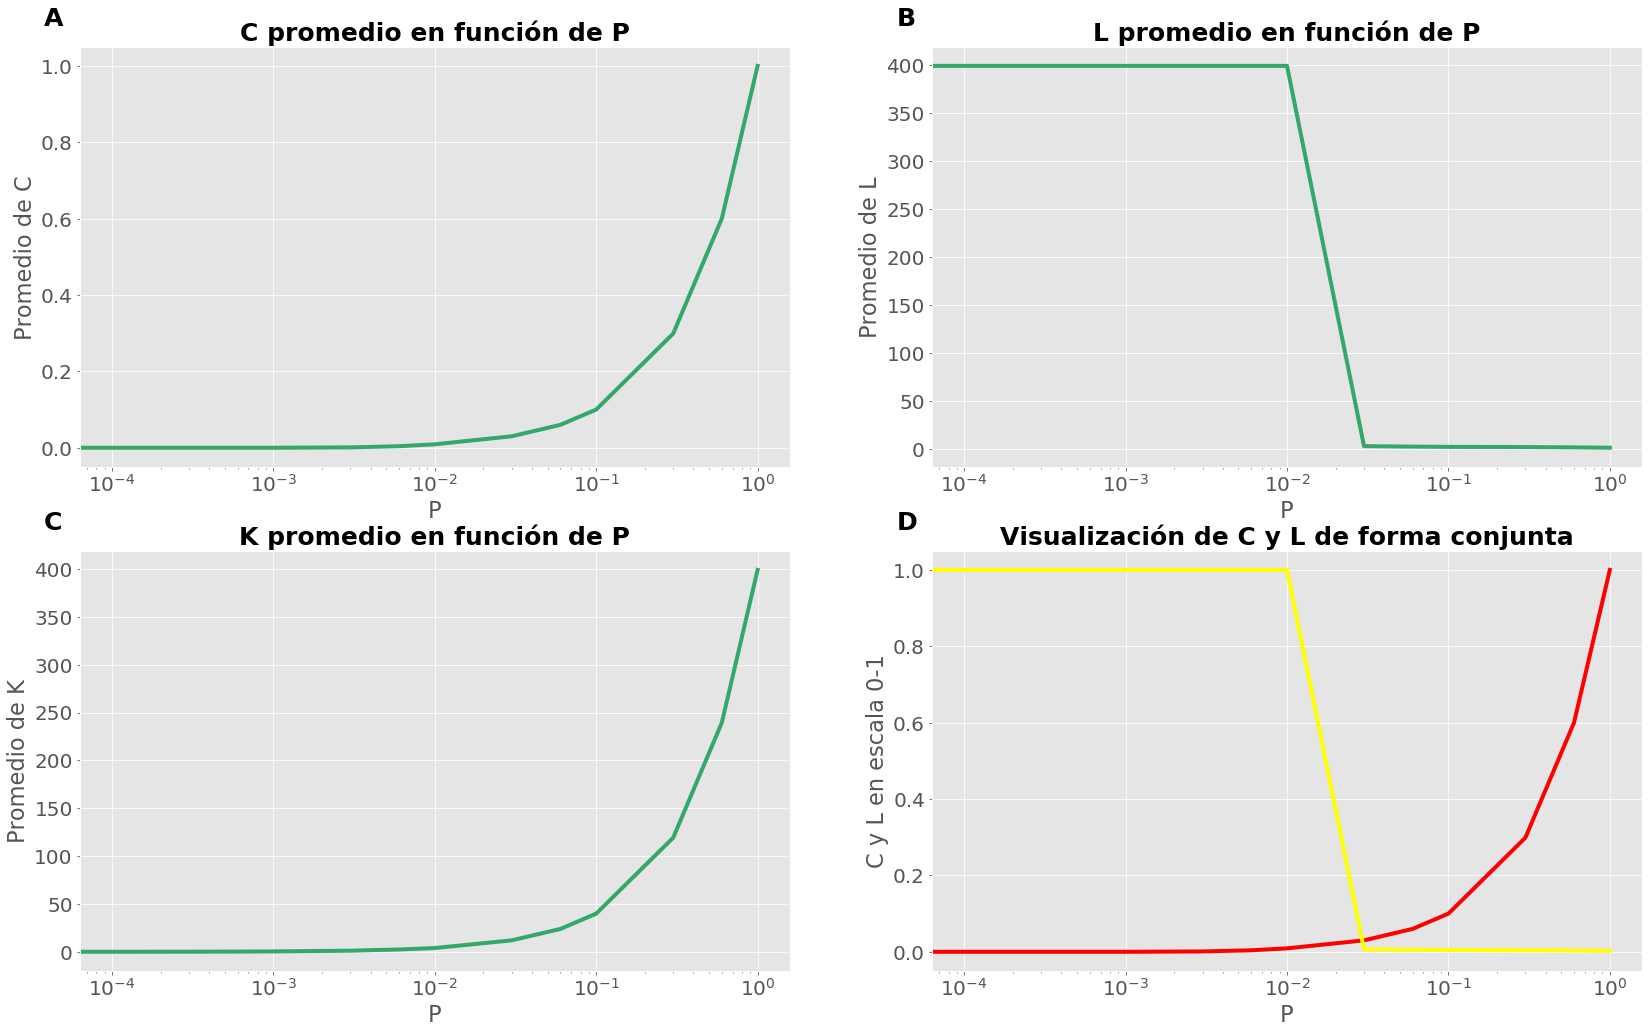

In [4]:
G_titles = ["C promedio en función de P", "L promedio en función de P", "K promedio en función de P",
            "Visualización de C y L de forma conjunta"]
G_ylabels = ["Promedio de C", "Promedio de L", "Promedio de K", "C y L en escala 0-1"]
textSize = 25
lineW = 4

# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_random_metrics[nax], linewidth = lineW, color = "#32a869")
    else:
        ax.plot(Probs, G_random_metrics[0], linewidth = lineW, color = "red")
        ax.plot(Probs, np.array(G_random_metrics[1])/max(G_random_metrics[1]), linewidth = lineW,
                color = "yellow")
    ax.set_title(G_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, size = textSize + 0.2,
            weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)

Como se puede observar en la primera gráfica, el comportamiento de C cambia para $P = 0.1$ $(10^{-1})$. Como se puede observar en la segunda gráfica, el comportamiento de L cambia para $P = 0.01$ $(10^{-2})$.

K sigue la misma distribución que C, solo que C está normalizado y K está en forma absoluta.

**Parece que multiplican, ponerlo de una de las dos formas** NO ENTIENDO QUÉ QUIERES DECIR.

### 2. Redes regulares y de mundo pequeño

**a. Usando la función de NetworkX watts_strogatz_graph(n, k, p) implementad una rutina Python L_C_small_world(n_graph, n, k, p) que devuelva valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) para un conjunto de n_graph grafos de tipo Small World.** El formato de la función debe ser:

`` [l,c] = L_C_Small_World(n_graph,n,k,p)``

Nota: En el caso de que el grafo no sea conexo, usad el valor n-1 para L en ese grafo.


In [5]:
def L_C_Small_World(n_graph, n, k, P):
    C = []
    L = []
    for graph in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), k

**b. Usando la rutina anterior, generar una gráfica con el comportamiento de C y L para distintos valores de la probabilidad p y un número fijo de nodos y ramas.** 

* Tomad N=400, k=8 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.].

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C? ¿Entre que valores de p dirías que está la zona de Small-World para estos valores de N y k. ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

* Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas.

* Con los datos que obtuviste en la práctica 1. ¿Dirías que la red de interacción de proteínas del Caernobidis Elegans puede ser considerada una red de mundo pequeño? Razona la respuesta.

In [6]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_SW_metrics.pkl"):
    with open("G_SW_metrics.pkl", "rb") as file:
        G_SW_metrics = pickle.load(file)
else:    
    C_results_2 = []
    L_results_2 = []
    K_results_2 = []
    for P in Probs:
        Indiv_results_2 = L_C_Small_World(20, 400, 8, P)
        C_results_2.append(Indiv_results_2[1])
        L_results_2.append(Indiv_results_2[0])
        K_results_2.append(Indiv_results_2[2])
    
    G_SW_metrics = [C_results_2, L_results_2, K_results_2]
    
    with open("G_SW_metrics.pkl", "wb") as file:
        pickle.dump(G_SW_metrics, file, -1)

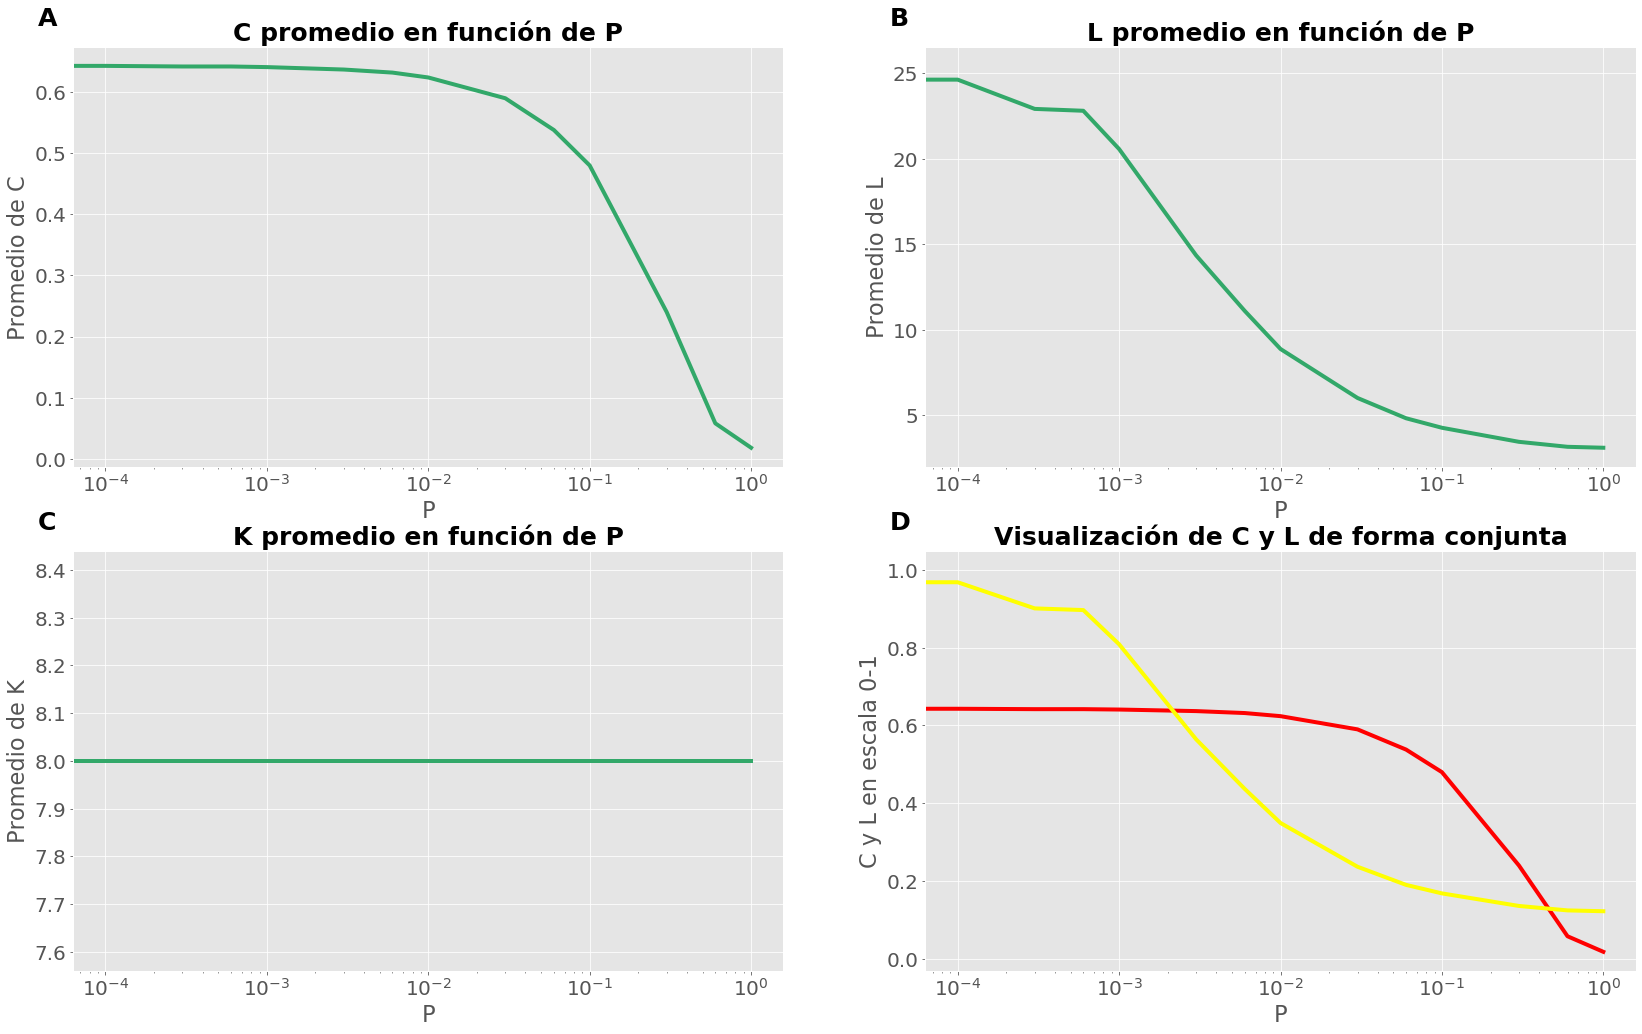

In [7]:
# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_SW_metrics[nax], linewidth = lineW, color = "#32a869")
    else:
        ax.plot(Probs, G_SW_metrics[0], linewidth = lineW, color = "red")
        ax.plot(Probs, np.array(G_SW_metrics[1])/max(G_SW_metrics[1]), linewidth = lineW, color = "yellow")
    ax.set_title(G_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, size = textSize + 0.2,
            weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)

Como se puede observar en la primera gráfica, el comportamiento de C cambia para $P = 0.01$ $(10^{-1})$.
Como se puede observar en la segunda gráfica, el comportamiento de L cambia para $P = 0.001$ $(10^{-3})$.

Por otro lado, se cumple el comportamiento teórico esperado para las redes de mundo pequeño: en cuanto P aumenta un poco, el camino característico baja mucho, mientras que el índice de clusterización se mantiene y cae con valores de P mayores.

La **zona de mundo pequeño** se define como aquella en la que C es más o menos igual que en un grafo regular y L es más o menos igual que en un grafo aleatorio. Otra definición es aquella zona en la que hay una clusterización alta y un camino característico bajo. De acuerdo a estas definiciones y a la visualización de la evolución de los parámetros C y L de forma conjunta (gráfica D), se podría decir que la zona de mundo pequeño es aquella ubicada aproximadamente entre los valores de $P = 10^{-3}$ y $P = 10^{-1}$.

El valor teórico de P para el cual se produce la transición de L es P = 1 / kN = 1 / (8·400) = 0.0003125 = $10^{-3.505}$. Como se ha dicho previamente, el cambio de comportamiento de L más drástico se produce a un valor de P = $10^{-3}$, de forma que el valor teórico y el observado son muy parecidos.

Respecto a la comparación de las gráficas obtenidas con las teóricas (diapositiva 36 del tema "Grafos aleatorios, grafos regulares y redes de mundo pequeño"), hay que destacar que son muy parecidas, si bien en las teóricas el camino característico cae antes y se parte de un índice de clusterización más alto.

Respecto a la red de Caernobidis Elegans, su C era de 0.075708 y, al no ser dirigido, su L sería de 1386. De acuerdo a estos valores y a lo observado en las gráficas teóricas y de estudio, yo creo que no se trataría de una red de mundo pequeño.

### Redes libres de Escala

**a. Generar una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)).** Calculad los valores de L, C y la distribución de grado de los nodos. Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [8]:
if os.path.isfile("G_SF_metrics.pkl"):
    with open("G_SF_metrics.pkl", "rb") as file:
        G_SF_metrics = pickle.load(file)
else:
    G_SF = nx.barabasi_albert_graph(10000, 10)
    C_SF = nx.average_clustering(G_SF)
    L_SF = nx.average_shortest_path_length(G_SF)
    m_SF = nx.number_of_edges(G_SF)
    Degree_dist_SF = nx.degree_histogram(G_SF)
    
    G_SF_metrics = [C_SF, L_SF, m_SF, Degree_dist_SF]
    
    with open("G_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_SF_metrics, file, -1)

In [9]:
if os.path.isfile("G_random_SF_metrics.pkl"):
    with open("G_random_SF_metrics.pkl", "rb") as file:
        G_random_SF_metrics = pickle.load(file)
else:
    G_AL = nx.gnm_random_graph(10000, G_SF_metrics[2])
    C_AL = nx.average_clustering(G_AL)
    L_AL = nx.average_shortest_path_length(G_AL)
    Degree_dist_AL = nx.degree_histogram(G_AL)
    
    G_random_SF_metrics = [C_AL, L_AL, Degree_dist_AL]
    
    with open("G_random_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_random_SF_metrics, file, -1)


 Las gráficas A y B corresponden a la red libre de escala, mientras que las C y D corresponden a la aleatoria 
 equivalente.


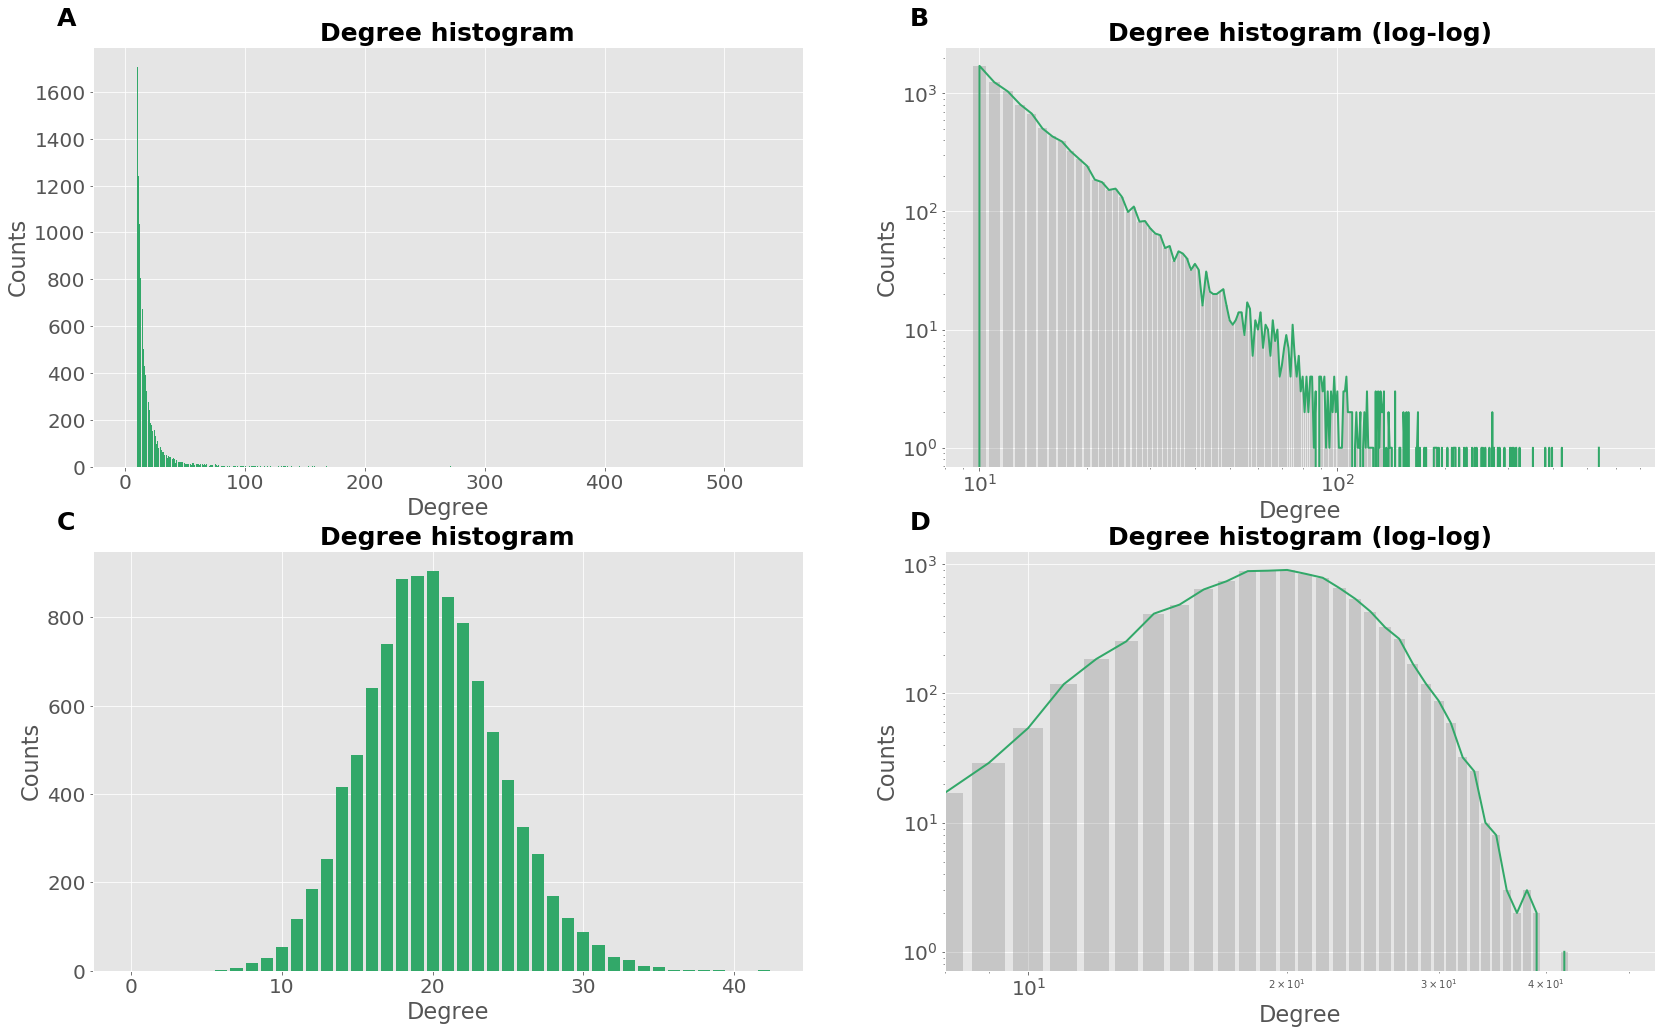

In [14]:
fig, axs = plt.subplots(2, 2, figsize = (28, 17))
textSize = 25
lineW = 4

Degree_dists = [G_SF_metrics[3], G_SF_metrics[3], G_random_SF_metrics[2], G_random_SF_metrics[2]]

print("\n Las gráficas A y B corresponden a la red libre de escala, mientras que las C y D corresponden a la",
      "aleatoria \n equivalente.")

for nax, ax in enumerate(axs.flat):
    if (nax == 0) or (nax == 2):
        ax.bar(range(len(Degree_dists[nax])), Degree_dists[nax], color = "#32a869")
        ax.set_title("Degree histogram", fontweight = "bold", fontsize =  textSize)
        #ax.set_ylim(0, 1300)
    elif (nax == 1) or (nax == 3):
        ax.bar(range(len(Degree_dists[nax])), Degree_dists[nax], color = "grey", alpha = 0.3)
        ax.plot(range(len(Degree_dists[nax])), Degree_dists[nax], linewidth = 2, color = "#32a869")
        ax.set_title("Degree histogram (log-log)", fontweight = "bold", fontsize =  textSize)
        ax.set_xscale("log", nonposx='clip')
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(8)
    
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Counts", fontsize = textSize * 0.9)
    ax.set_xlabel("Degree", fontsize = textSize * 0.9)  
    ax.tick_params(labelsize = textSize * 0.8)

In [11]:
print("El índice de clusterización de la red libre de escala creada es:", G_SF_metrics[0])
print("El camino característico de la red libre de escala creada es:", G_SF_metrics[1], "\n")
print("El índice de clusterización de la red aleatoria equivalente a la libre de escala creada es:",
      G_random_SF_metrics[0])
print("El camino característico de la red aleatoria equivalente a la libre de escala creada es:",
      G_random_SF_metrics[1])

El índice de clusterización de la red libre de escala creada es: 0.010585222161397909
El camino característico de la red libre de escala creada es: 3.0729635163516353 

El índice de clusterización de la red aleatoria equivalente a la libre de escala creada es: 0.0018992100687198932
El camino característico de la red aleatoria equivalente a la libre de escala creada es: 3.4032812681268125


El índice de clusterización de la red libre de escala es un orden de magnitud mayor que el de la red aleatoria equivalente, de forma que hay un sesgo en la misma; mientras que el camino característico es es más pequeño. Las propiedades de las redes libres de escala son: camino característico corto, incluso más que en el grafo aleatorio equivalente; índice de clusterización pequeño y decreciente (a mayor número de nodos). Ambas propiedades se cumplen en el caso de la red libre de escala creada (comparada con la aleatoria equivalente).